In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Prevent line breaks and show full text
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
# Set high display width
pd.set_option('display.width', 2000)

#Load the dataset
df= pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

In [34]:
#Basic information about the dataset
print(df.shape)
print(df.info())
print(df.columns)

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [3]:
#Check for missing values and blanks 
blank_count = (df == " ").sum()
print(blank_count)

df['TotalCharges']=df.TotalCharges.replace(" ", 0)
print(df.dtypes)

#Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object


In [4]:
#checking for duplicates and duplicate for customerID
duplicates = df.duplicated().sum()
print(duplicates)

print(df['customerID'].duplicated().sum())

0
0


In [11]:
#Convert SeniorCitizen column from numeric to categorical
def senior_citi_conversion(value):
    if value == 0:
        return  'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(senior_citi_conversion)
print(df.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
0  7590-VHVEG  Female            no     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85    No
1  5575-GNVDE    Male            no      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50    No
2  3668-QPYBK    Male            no      No         No       2          Yes                No             DSL            Yes   

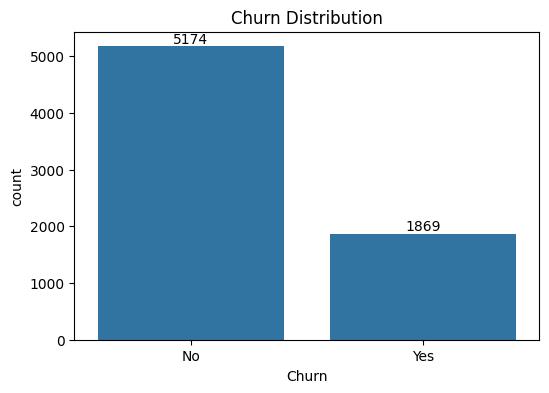

In [6]:
plt.figure(figsize=(6,4))
ax=sns.countplot(data= df, x='Churn')
plt.title('Churn Distribution')
ax.bar_label(ax.containers[0])
plt.show()



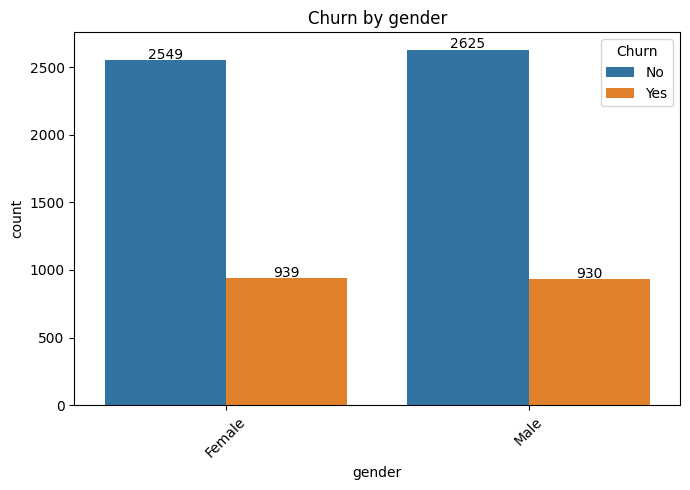

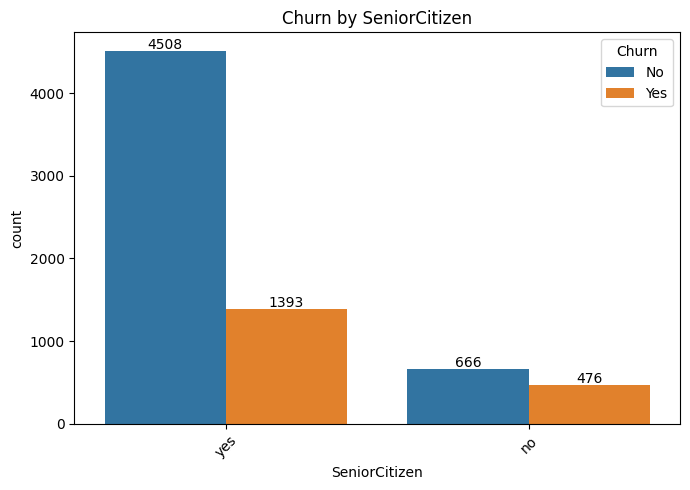

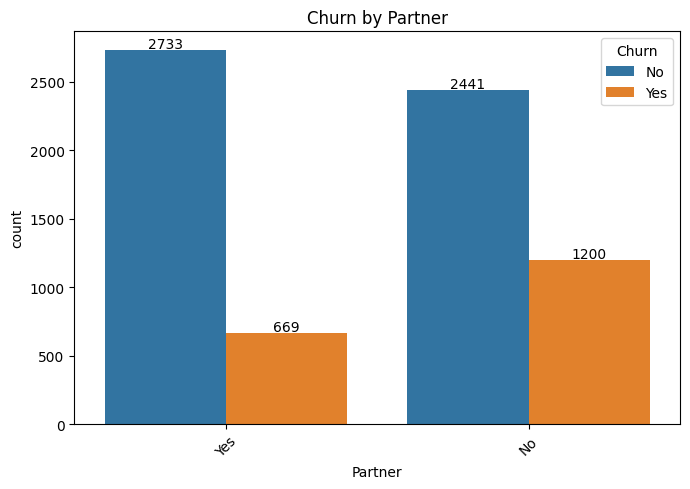

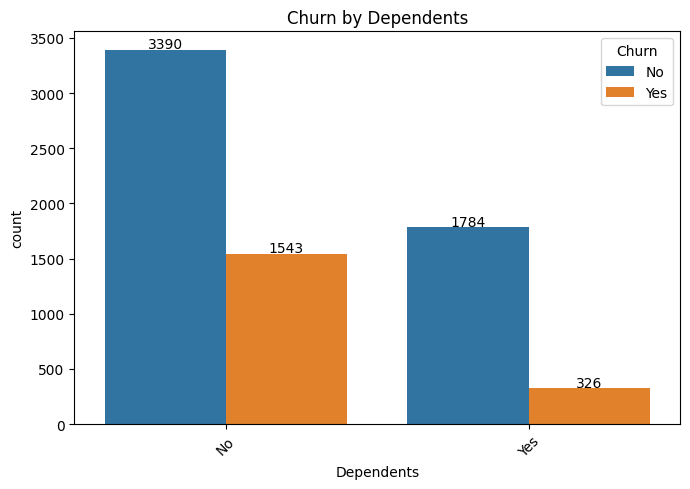

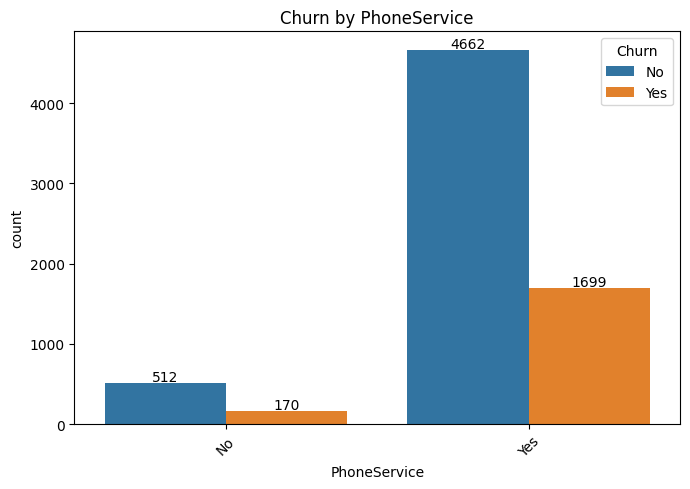

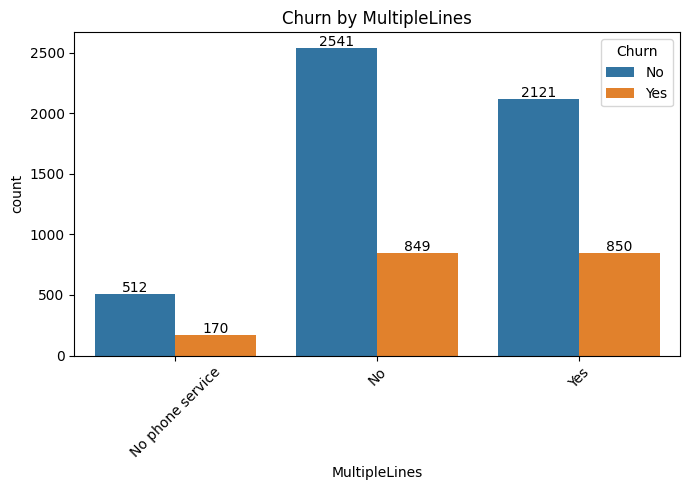

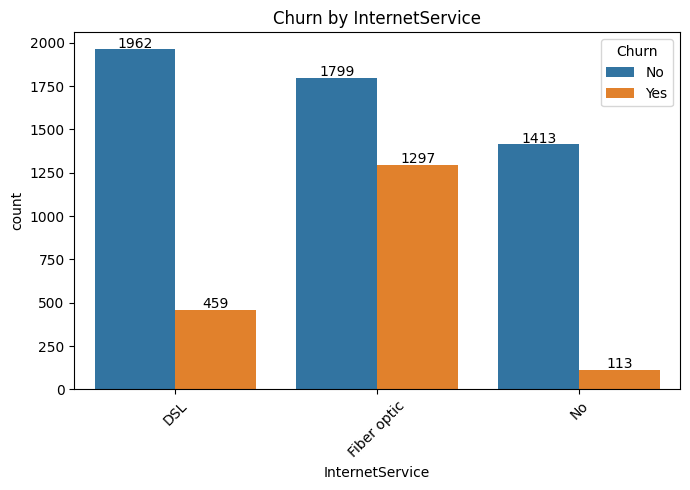

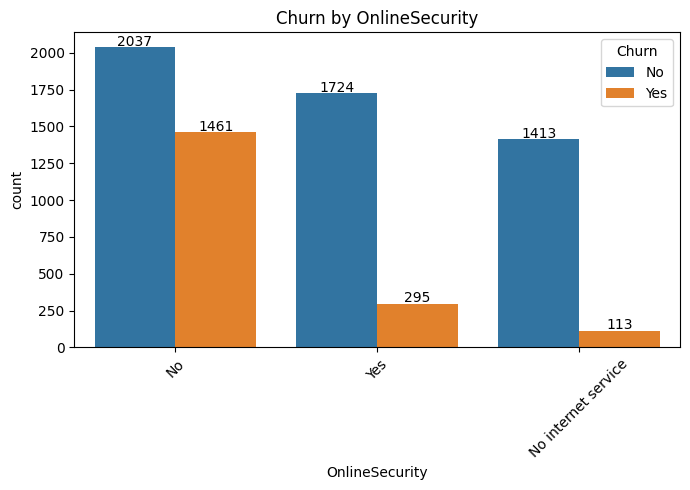

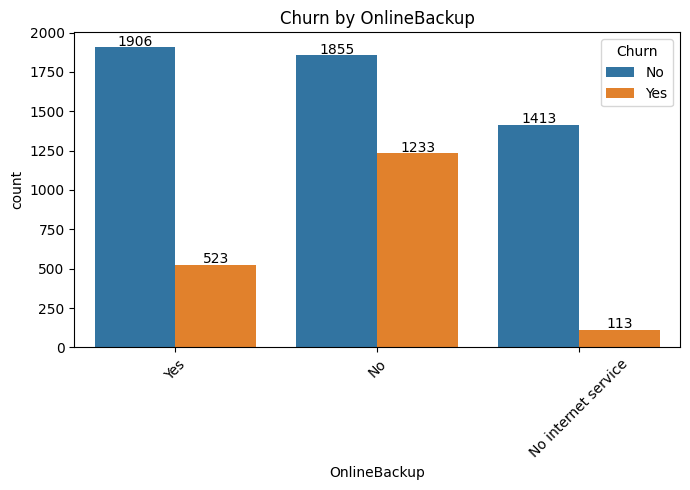

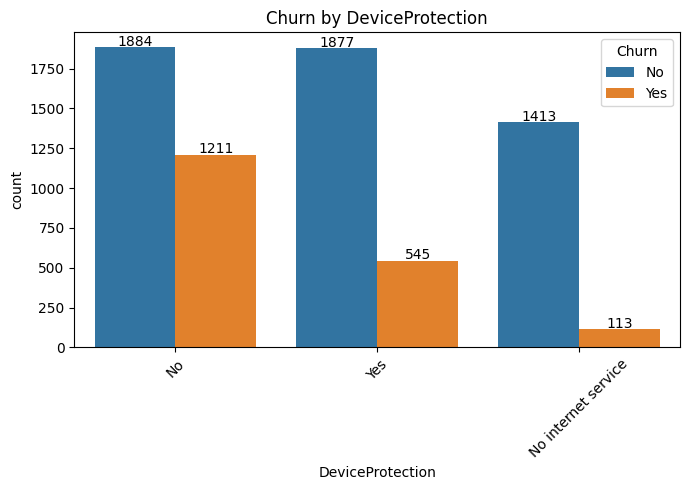

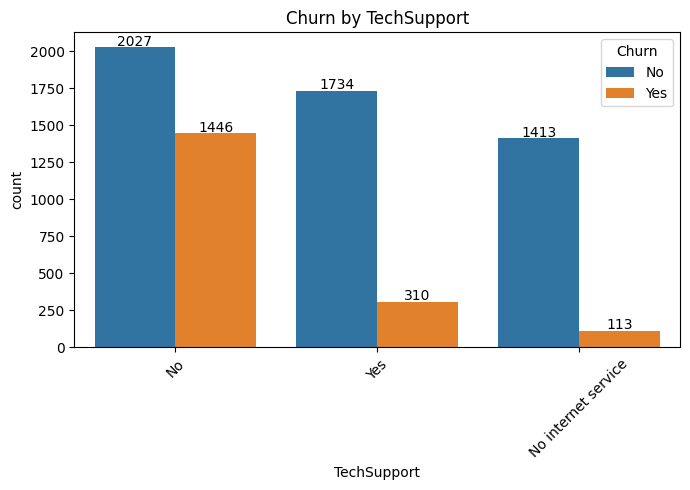

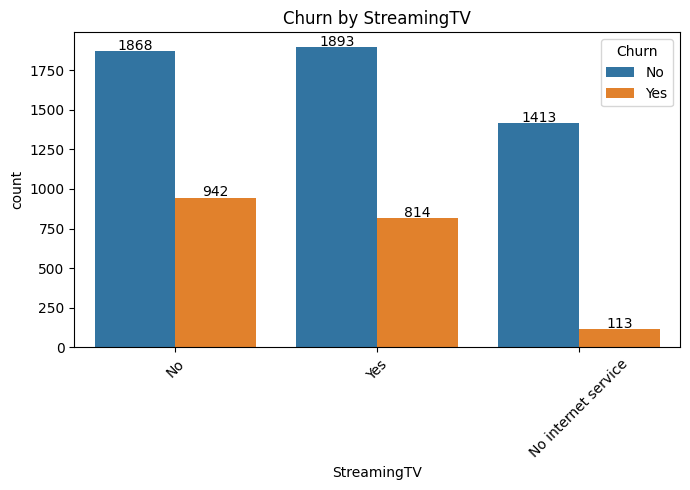

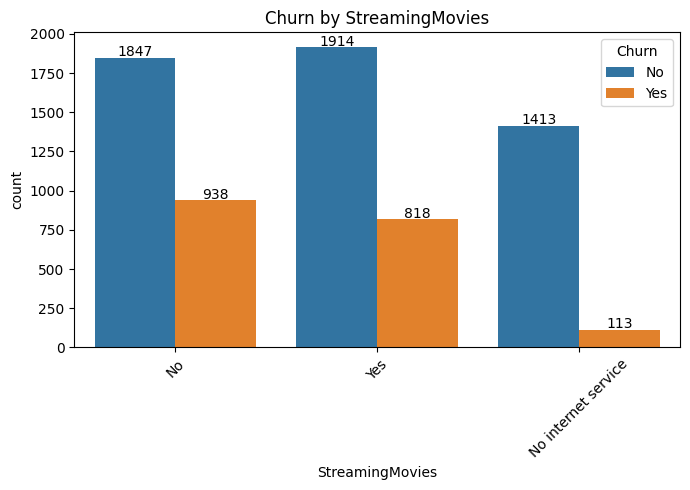

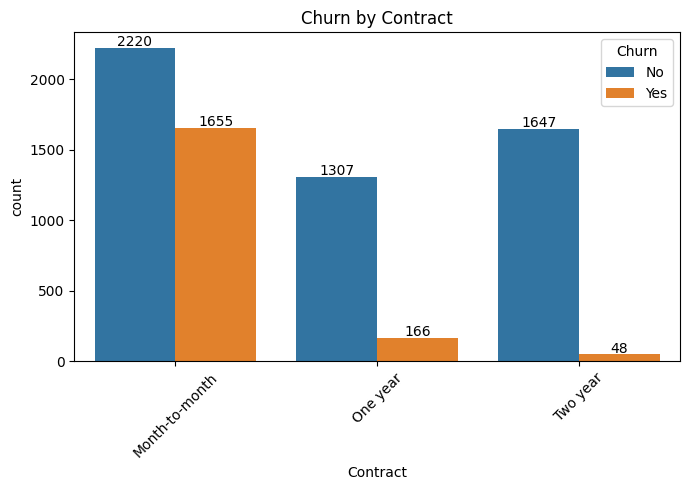

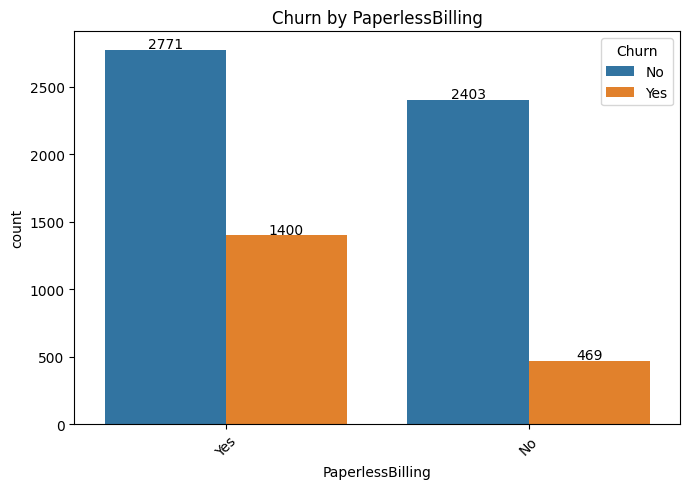

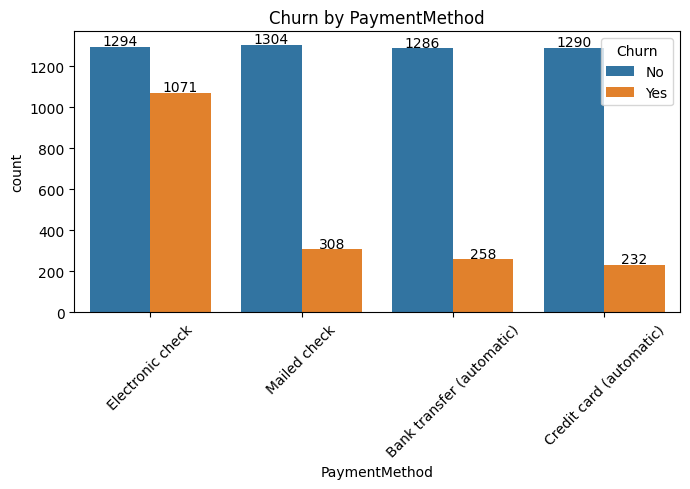

In [7]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(7,5))
    ax=sns.countplot(data=df, x=col, hue='Churn')
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=-1)

    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

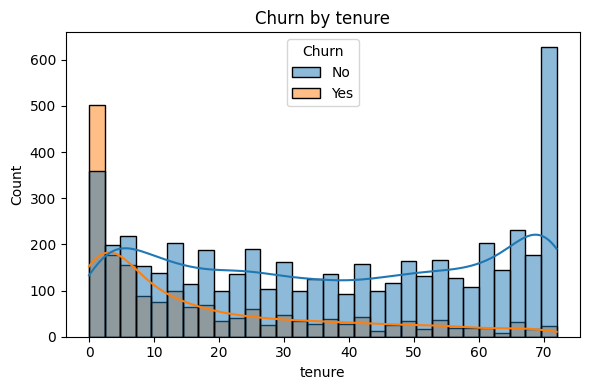

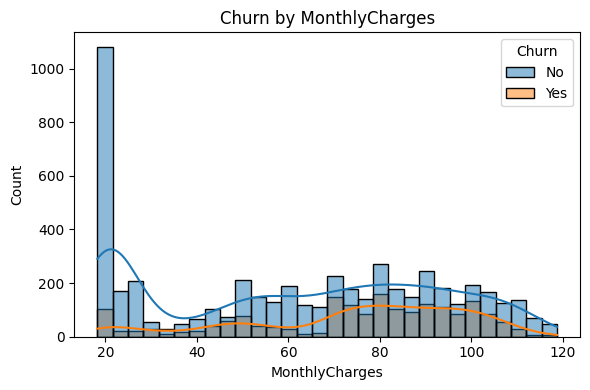

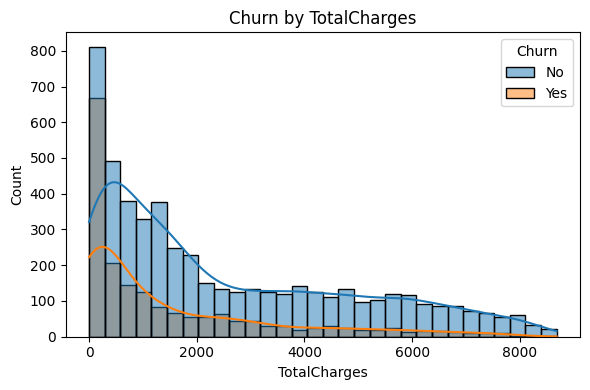

In [8]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f"Churn by {col}")
    plt.tight_layout()
    plt.show()

In [10]:
df.to_csv("cleaned_telco_churn.csv", index=False)
print("EDA complete and cleaned dataset saved.")

EDA complete and cleaned dataset saved.
